In [1]:
import scdrs
import scanpy as sc
sc.set_figure_params(dpi=300)
from anndata import AnnData
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings


In [10]:
nafld_ds

raw_score  norm_score   mc_pval      pval  \
H12_AAACGCTTCCACAAGT-1     0.118747    0.512515  0.307692  0.298155   
H12_AAAGGATCACGTGAGA-1     0.169490    1.219533  0.113886  0.113310   
H12_AAAGGATCATCCTTGC-1     0.149092    0.819024  0.203796  0.204165   
H12_AAAGGATGTCATACCA-1     0.142301   -0.991429  0.826174  0.839431   
H12_AAAGGATTCTTCGGTC-1     0.158823    0.193974  0.408591  0.414333   
...                             ...         ...       ...       ...   
OD306_TTTGGTTCATAGGCGA-1   0.149867    0.607653  0.250749  0.266821   
OD306_TTTGGTTGTAGCCAGA-1   0.075919    0.296417  0.358641  0.375370   
OD306_TTTGGTTGTTACAGCT-1   0.167237    0.092518  0.463536  0.453801   
OD306_TTTGGTTTCGACATCA-1   0.191865    0.014760  0.493507  0.484609   
OD306_TTTGTTGTCGTTCTAT-1   0.129999   -0.015852  0.479520  0.496842   

                          nlog10_pval    zscore  ctrl_norm_score_0  \
H12_AAACGCTTCCACAAGT-1       0.525558  0.529714          -2.203354   
H12_AAAGGATCACGTGAGA-1       0.945732  1.209111          -1.370549   
H12_AAAGGATCATCCTTGC-1       0.690020  0.826837           1.302333   
H12_AAAGGATGTCATACCA-1       0.076015 -0.992123          -1.583584   
H12_AAAGGATTCTTCGGTC-1       0.382651  0.216414           0.750756   
...                               ...       ...                ...   
OD306_TTTGGTTCATAGGCGA-1     0.573780  0.622456          -0.198975   
OD306_TTTGGTTGTAGCCAGA-1     0.425540  0.317664          -0.937956   
OD306_TTTGGTTGTTACAGCT-1     0.343135  0.116064           0.930317   
OD306_TTTGGTTTCGACATCA-1     0.314608  0.038589          -0.664527   
OD306_TTTGTTGTCGTTCTAT-1     0.303782  0.007916          -1.619492   

                          ctrl_norm_score_1  ctrl_norm_score_2  \
H12_AAACGCTTCCACAAGT-1            -0.302678           0.589301   
H12_AAAGGATCACGTGAGA-1            -0.161333           0.433520   
H12_AAAGGATCATCCTTGC-1            -1.041049           0.669470   
H12_AAAGGATGTCATACCA-1             0.628367           0.962494   
H12_AAAGGATTCTTCGGTC-1            -0.004228          -1.561632   
...                                     ...                ...   
OD306_TTTGGTTCATAGGCGA-1           0.239186          -0.956997   
OD306_TTTGGTTGTAGCCAGA-1          -0.346272           1.173017   
OD306_TTTGGTTGTTACAGCT-1           0.816333          -2.004275   
OD306_TTTGGTTTCGACATCA-1           1.525120           0.512298   
OD306_TTTGTTGTCGTTCTAT-1           0.553941           0.495733   

                          ctrl_norm_score_3  ...  ctrl_norm_score_990  \
H12_AAACGCTTCCACAAGT-1            -0.085151  ...            -2.088752   
H12_AAAGGATCACGTGAGA-1            -0.595979  ...            -1.131514   
H12_AAAGGATCATCCTTGC-1             1.164349  ...            -1.302669   
H12_AAAGGATGTCATACCA-1             0.878234  ...            -0.348637   
H12_AAAGGATTCTTCGGTC-1             0.180976  ...             0.528237   
...                                     ...  ...                  ...   
OD306_TTTGGTTCATAGGCGA-1           1.198408  ...             1.368424   
OD306_TTTGGTTGTAGCCAGA-1           1.426898  ...            -1.947874   
OD306_TTTGGTTGTTACAGCT-1           1.653118  ...            -0.150441   
OD306_TTTGGTTTCGACATCA-1          -0.409158  ...            -1.503316   
OD306_TTTGTTGTCGTTCTAT-1           0.453828  ...            -0.707192   

                          ctrl_norm_score_991  ctrl_norm_score_992  \
H12_AAACGCTTCCACAAGT-1              -0.199176            -0.109474   
H12_AAAGGATCACGTGAGA-1               0.096268            -0.870695   
H12_AAAGGATCATCCTTGC-1              -0.021647             0.703013   
H12_AAAGGATGTCATACCA-1              -0.338838            -0.062516   
H12_AAAGGATTCTTCGGTC-1              -1.520943            -0.444220   
...                                       ...                  ...   
OD306_TTTGGTTCATAGGCGA-1             1.157951            -0.191359   
OD306_TTTGGTTGTAGCCAGA-1            -0.855445             0.607406   
OD306_TTTGGTTGTTACAGCT-1        

In [3]:
nafld_ds = pd.read_csv('full_scores/nafld.full_score.gz', sep = '\t', index_col = 0)

raw_score  norm_score   mc_pval      pval  \
H12_AAATGGAAGGTACAGC-1     0.204612    3.555915  0.001998  0.000451   
H12_AACAACCAGTTACTCG-1     0.161493    1.905766  0.038961  0.032098   
H12_ACAGAAATCGCCGTGA-1     0.176058    1.879927  0.047952  0.033865   
H12_ACATCCCAGTATGTAG-1     0.172017    2.364332  0.011988  0.011616   
H12_ACTACGATCTATTCGT-1     0.126285    2.329125  0.010989  0.012626   
...                             ...         ...       ...       ...   
OD306_TTCCTCTCAATACGCT-1   0.183957    1.753180  0.041958  0.043704   
OD306_TTCGGTCCAAGAGGTC-1   0.202741    2.570366  0.009990  0.007078   
OD306_TTGATGGAGCTGACAG-1   0.205168    2.109434  0.026973  0.020797   
OD306_TTGGTTTGTATCCCTC-1   0.108162    1.795601  0.044955  0.040144   
OD306_TTGTGGAGTATGTCAC-1   0.160892    1.732662  0.048951  0.045483   

                          nlog10_pval    zscore  ctrl_norm_score_0  \
H12_AAATGGAAGGTACAGC-1       3.346295  3.319738          -0.528807   
H12_AACAACCAGTTACTCG-1       1.493517  1.850811           1.373097   
H12_ACAGAAATCGCCGTGA-1       1.470255  1.826805           0.469644   
H12_ACATCCCAGTATGTAG-1       1.934960  2.269612           0.472301   
H12_ACTACGATCTATTCGT-1       1.898731  2.237523           0.164030   
...                               ...       ...                ...   
OD306_TTCCTCTCAATACGCT-1     1.359475  1.709227          -1.084585   
OD306_TTCGGTCCAAGAGGTC-1     2.150112  2.453299           1.251830   
OD306_TTGATGGAGCTGACAG-1     1.682004  2.037564           0.365502   
OD306_TTGGTTTGTATCCCTC-1     1.396379  1.749017           0.318231   
OD306_TTGTGGAGTATGTCAC-1     1.342147  1.690319           0.250055   

                          ctrl_norm_score_1  ctrl_norm_score_2  \
H12_AAATGGAAGGTACAGC-1            -0.023736           1.186739   
H12_AACAACCAGTTACTCG-1             0.427096           3.211977   
H12_ACAGAAATCGCCGTGA-1             0.509846          -0.798492   
H12_ACATCCCAGTATGTAG-1            -1.052273           1.876146   
H12_ACTACGATCTATTCGT-1            -0.695027           0.842176   
...                                     ...                ...   
OD306_TTCCTCTCAATACGCT-1          -0.088880           0.489525   
OD306_TTCGGTCCAAGAGGTC-1          -0.946205          -0.361780   
OD306_TTGATGGAGCTGACAG-1           0.878666          -1.950831   
OD306_TTGGTTTGTATCCCTC-1          -1.092758           1.774761   
OD306_TTGTGGAGTATGTCAC-1          -0.105893           0.441911   

                          ctrl_norm_score_3  ...  ctrl_norm_score_990  \
H12_AAATGGAAGGTACAGC-1             0.172784  ...             0.765037   
H12_AACAACCAGTTACTCG-1            -0.465892  ...            -0.165298   
H12_ACAGAAATCGCCGTGA-1            -1.053650  ...             0.624840   
H12_ACATCCCAGTATGTAG-1             0.983025  ...            -1.361185   
H12_ACTACGATCTATTCGT-1             0.533354  ...            -1.174643   
...                                     ...  ...                  ...   
OD306_TTCCTCTCAATACGCT-1          -0.296415  ...             0.702247   
OD306_TTCGGTCCAAGAGGTC-1           1.404377  ...            -0.461119   
OD306_TTGATGGAGCTGACAG-1          -0.671402  ...            -1.251176   
OD306_TTGGTTTGTATCCCTC-1           0.713612  ...            -1.132493   
OD306_TTGTGGAGTATGTCAC-1           0.050111  ...            -0.538158   

                          ctrl_norm_score_991  ctrl_norm_score_992  \
H12_AAATGGAAGGTACAGC-1              -0.864951            -2.604583   
H12_AACAACCAGTTACTCG-1               0.032739            -0.295663   
H12_ACAGAAATCGCCGTGA-1               0.531453             0.884031   
H12_ACATCCCAGTATGTAG-1              -0.046175             0.085365   
H12_ACTACGATCTATTCGT-1              -0.640606             0.635255   
...                                       ...                  ...   
OD306_TTCCTCTCAATACGCT-1            -0.753791            -0.545179   
OD306_TTCGGTCCAAGAGGTC-1            -1.266966             1.883778   
OD306_TTGATGGAGCTGACAG-1        

In [5]:
adata = sc.read_h5ad('../20240528_hss_scdrs/data/adata/hs_apcs_snn.h5ad')
adata.obs["NAFLD_p"] = nafld_ds.loc[:, "mc_pval"]

/home/skymoswu/mambaforge/envs/scdrs_env/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/skymoswu/mambaforge/envs/scdrs_env/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


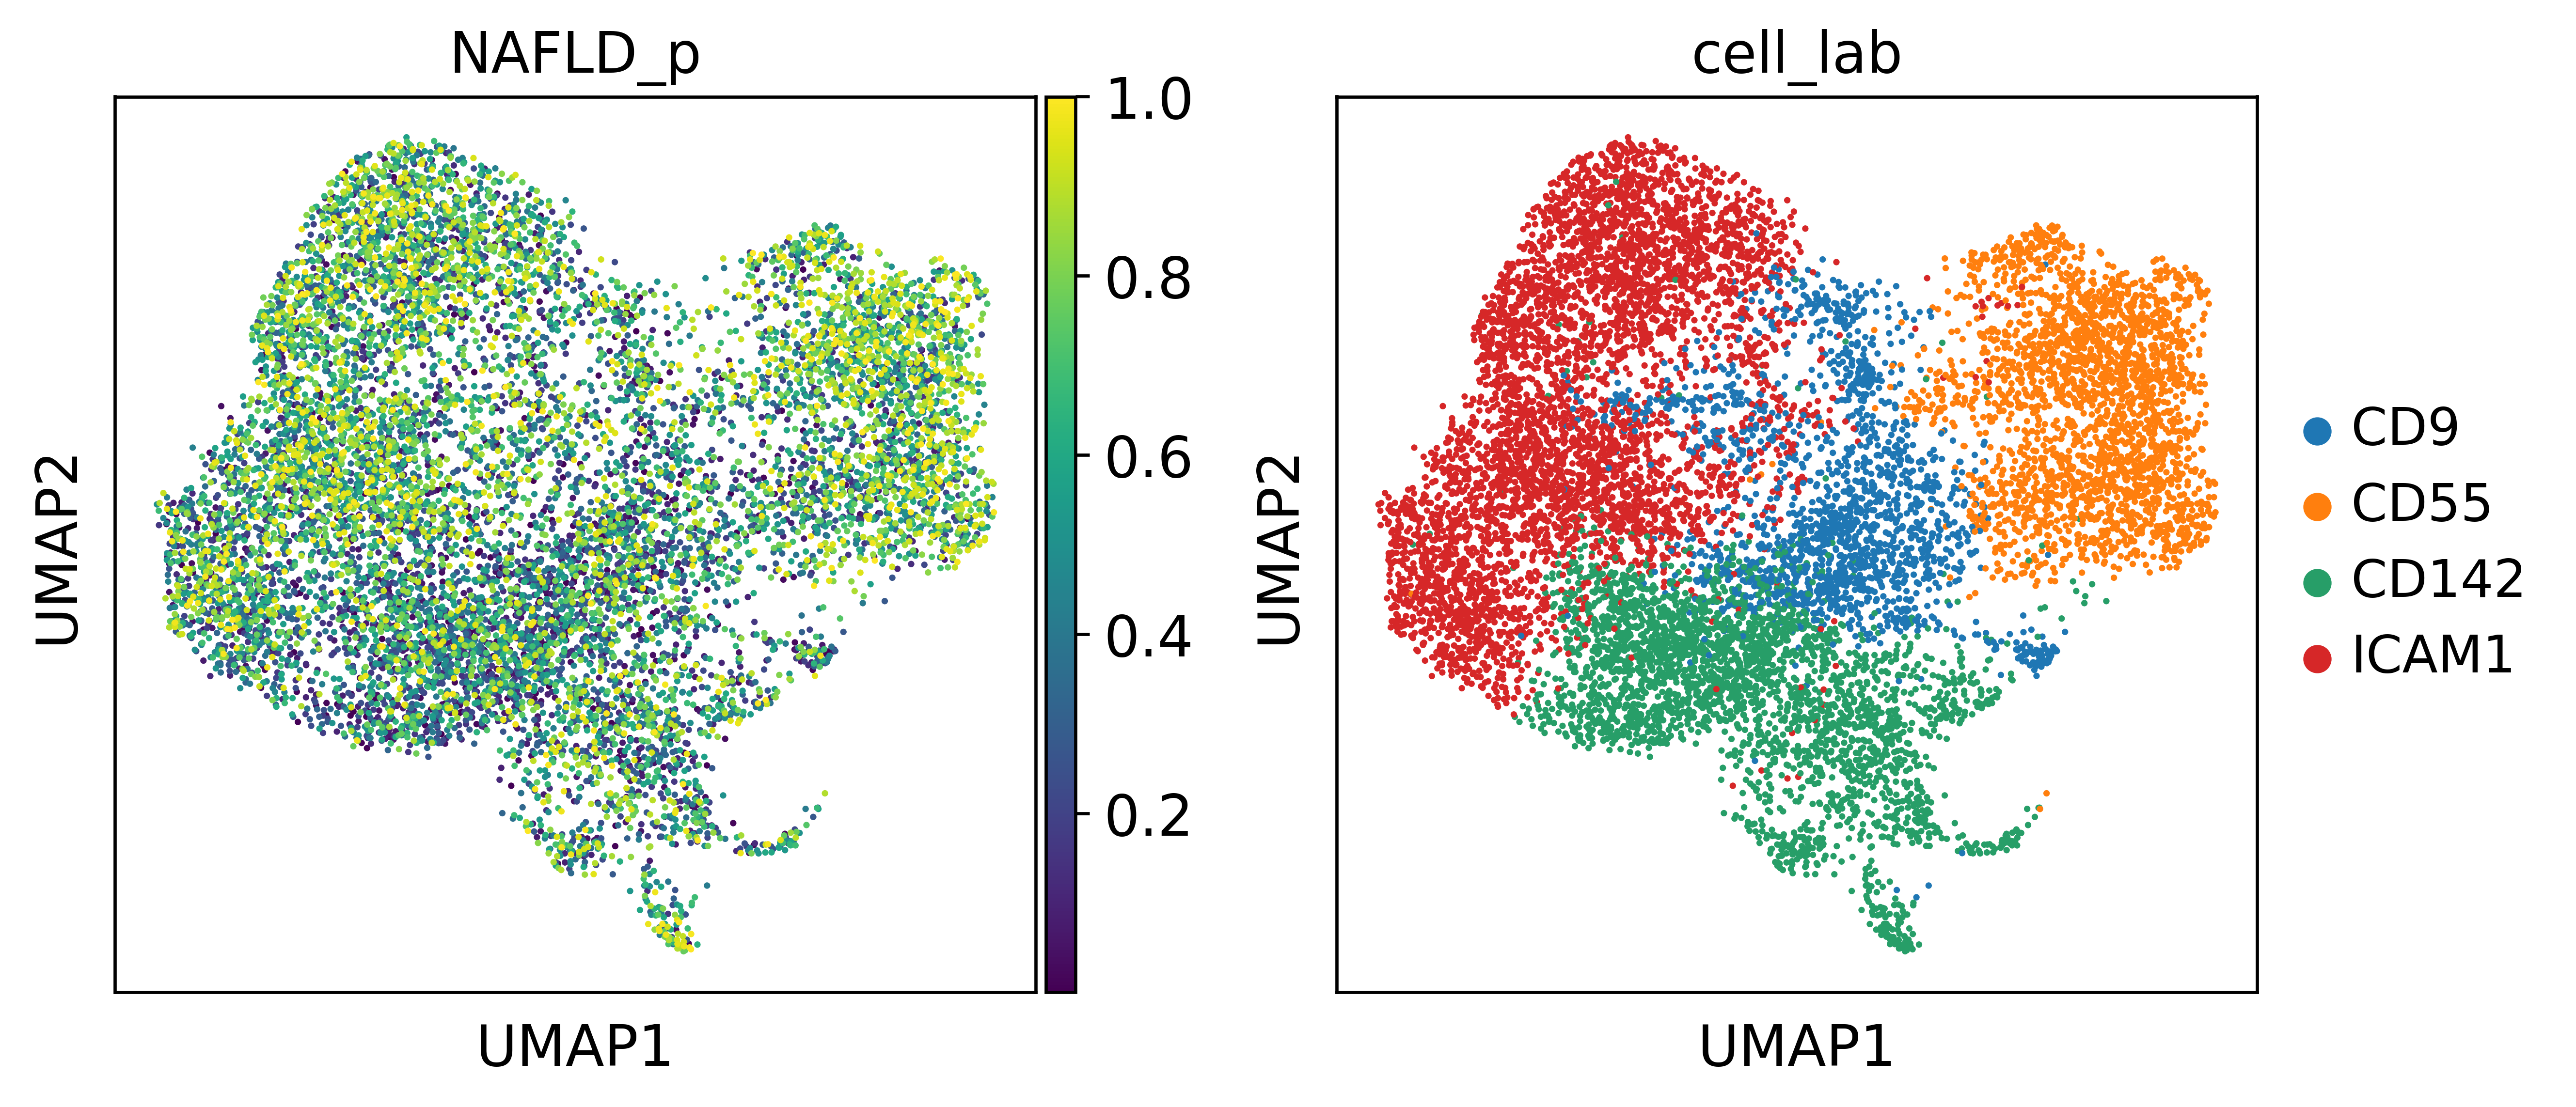

/home/skymoswu/mambaforge/envs/scdrs_env/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/skymoswu/mambaforge/envs/scdrs_env/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


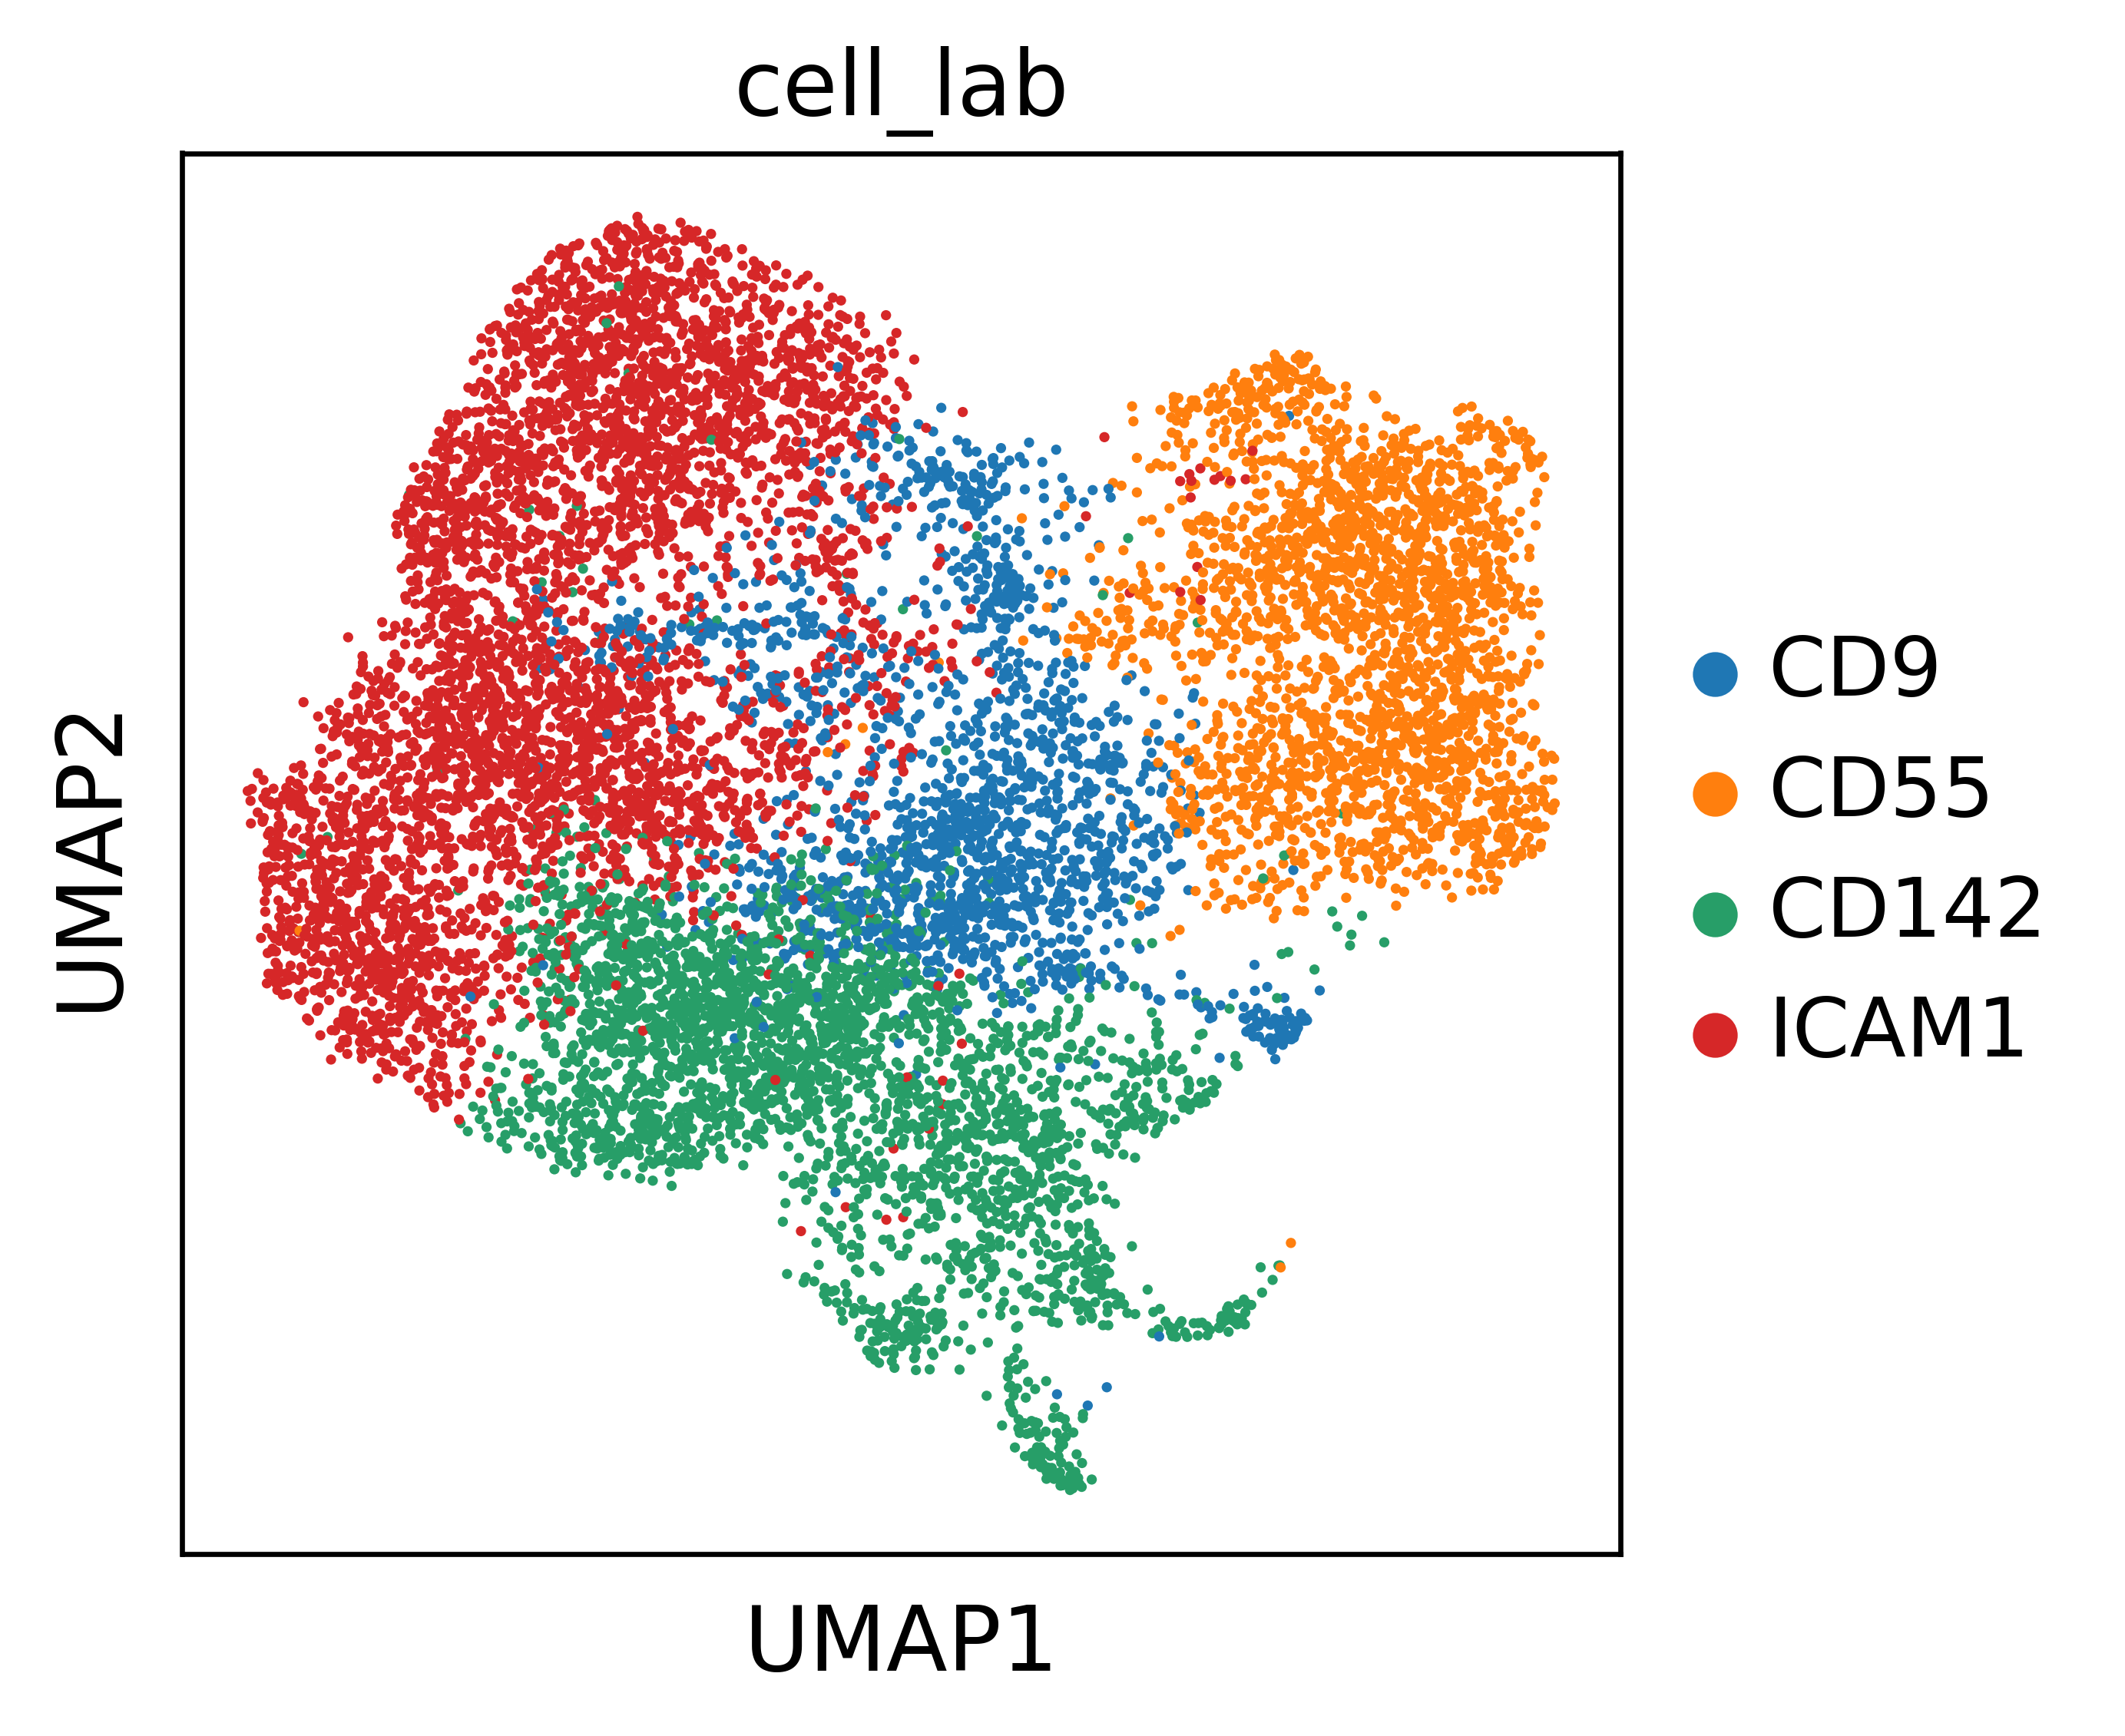

In [8]:
sc.pl.umap(adata, color = ["NAFLD_p", "cell_lab"])

In [2]:
traits_arr = [
    'bmi1', 'ldl1', 'nafld', 'pdff', 'tg1', 'whr1'
]

In [7]:
groupwise_stats_dct = {
    t: pd.read_csv(f"groupwise/{t}.scdrs_group.cell_lab", sep = '\t',index_col = 0) for t in traits_arr
}

/home/skymoswu/bin/scDRS/scdrs/util.py:527: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_hetero_fdr = df_hetero_fdr.applymap(lambda x: "×" if x < 0.05 else "")
/home/skymoswu/bin/scDRS/scdrs/util.py:557: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


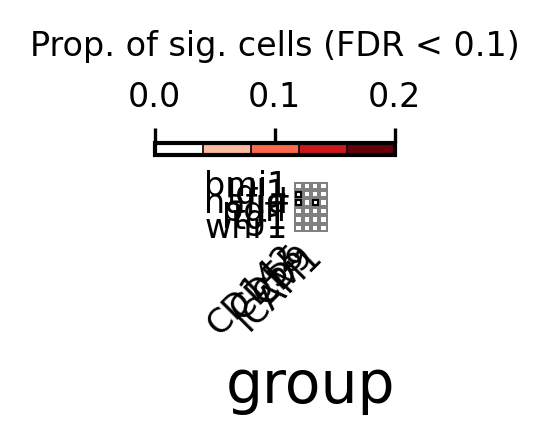

In [26]:
scdrs.util.plot_group_stats(
    {
        trait: df_stats for trait, df_stats in groupwise_stats_dct.items()
    }
)
plt.savefig("full_scores/group_wise.pdf")